## Task 1

x: Income\
y: Life expectancy\
color: World regions\
size: Population

In [372]:
import pandas as pd
import plotnine as p9
import numpy as np

q1_df = pd.read_csv("./Data/q1data.csv")
missing = q1_df[q1_df[['income', 'life_exp', 'population']].isna().any(axis=1)]
q1_df.drop(missing.index, inplace=True)
q1_df[q1_df.isna().any(axis=1)]

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
56,7580.0,49.8,1060000.0,2010,Eswatini,NaN,NaN,NaN,NaN
129,13800.0,73.7,2070000.0,2010,North Macedonia,NaN,NaN,NaN,NaN


In [373]:
# Impute missing values
q1_df.loc[q1_df['country'] == 'Eswatini', 'four_regions'] = 'africa'
q1_df.loc[q1_df['country'] == 'North Macedonia', 'four_regions'] = 'europe'

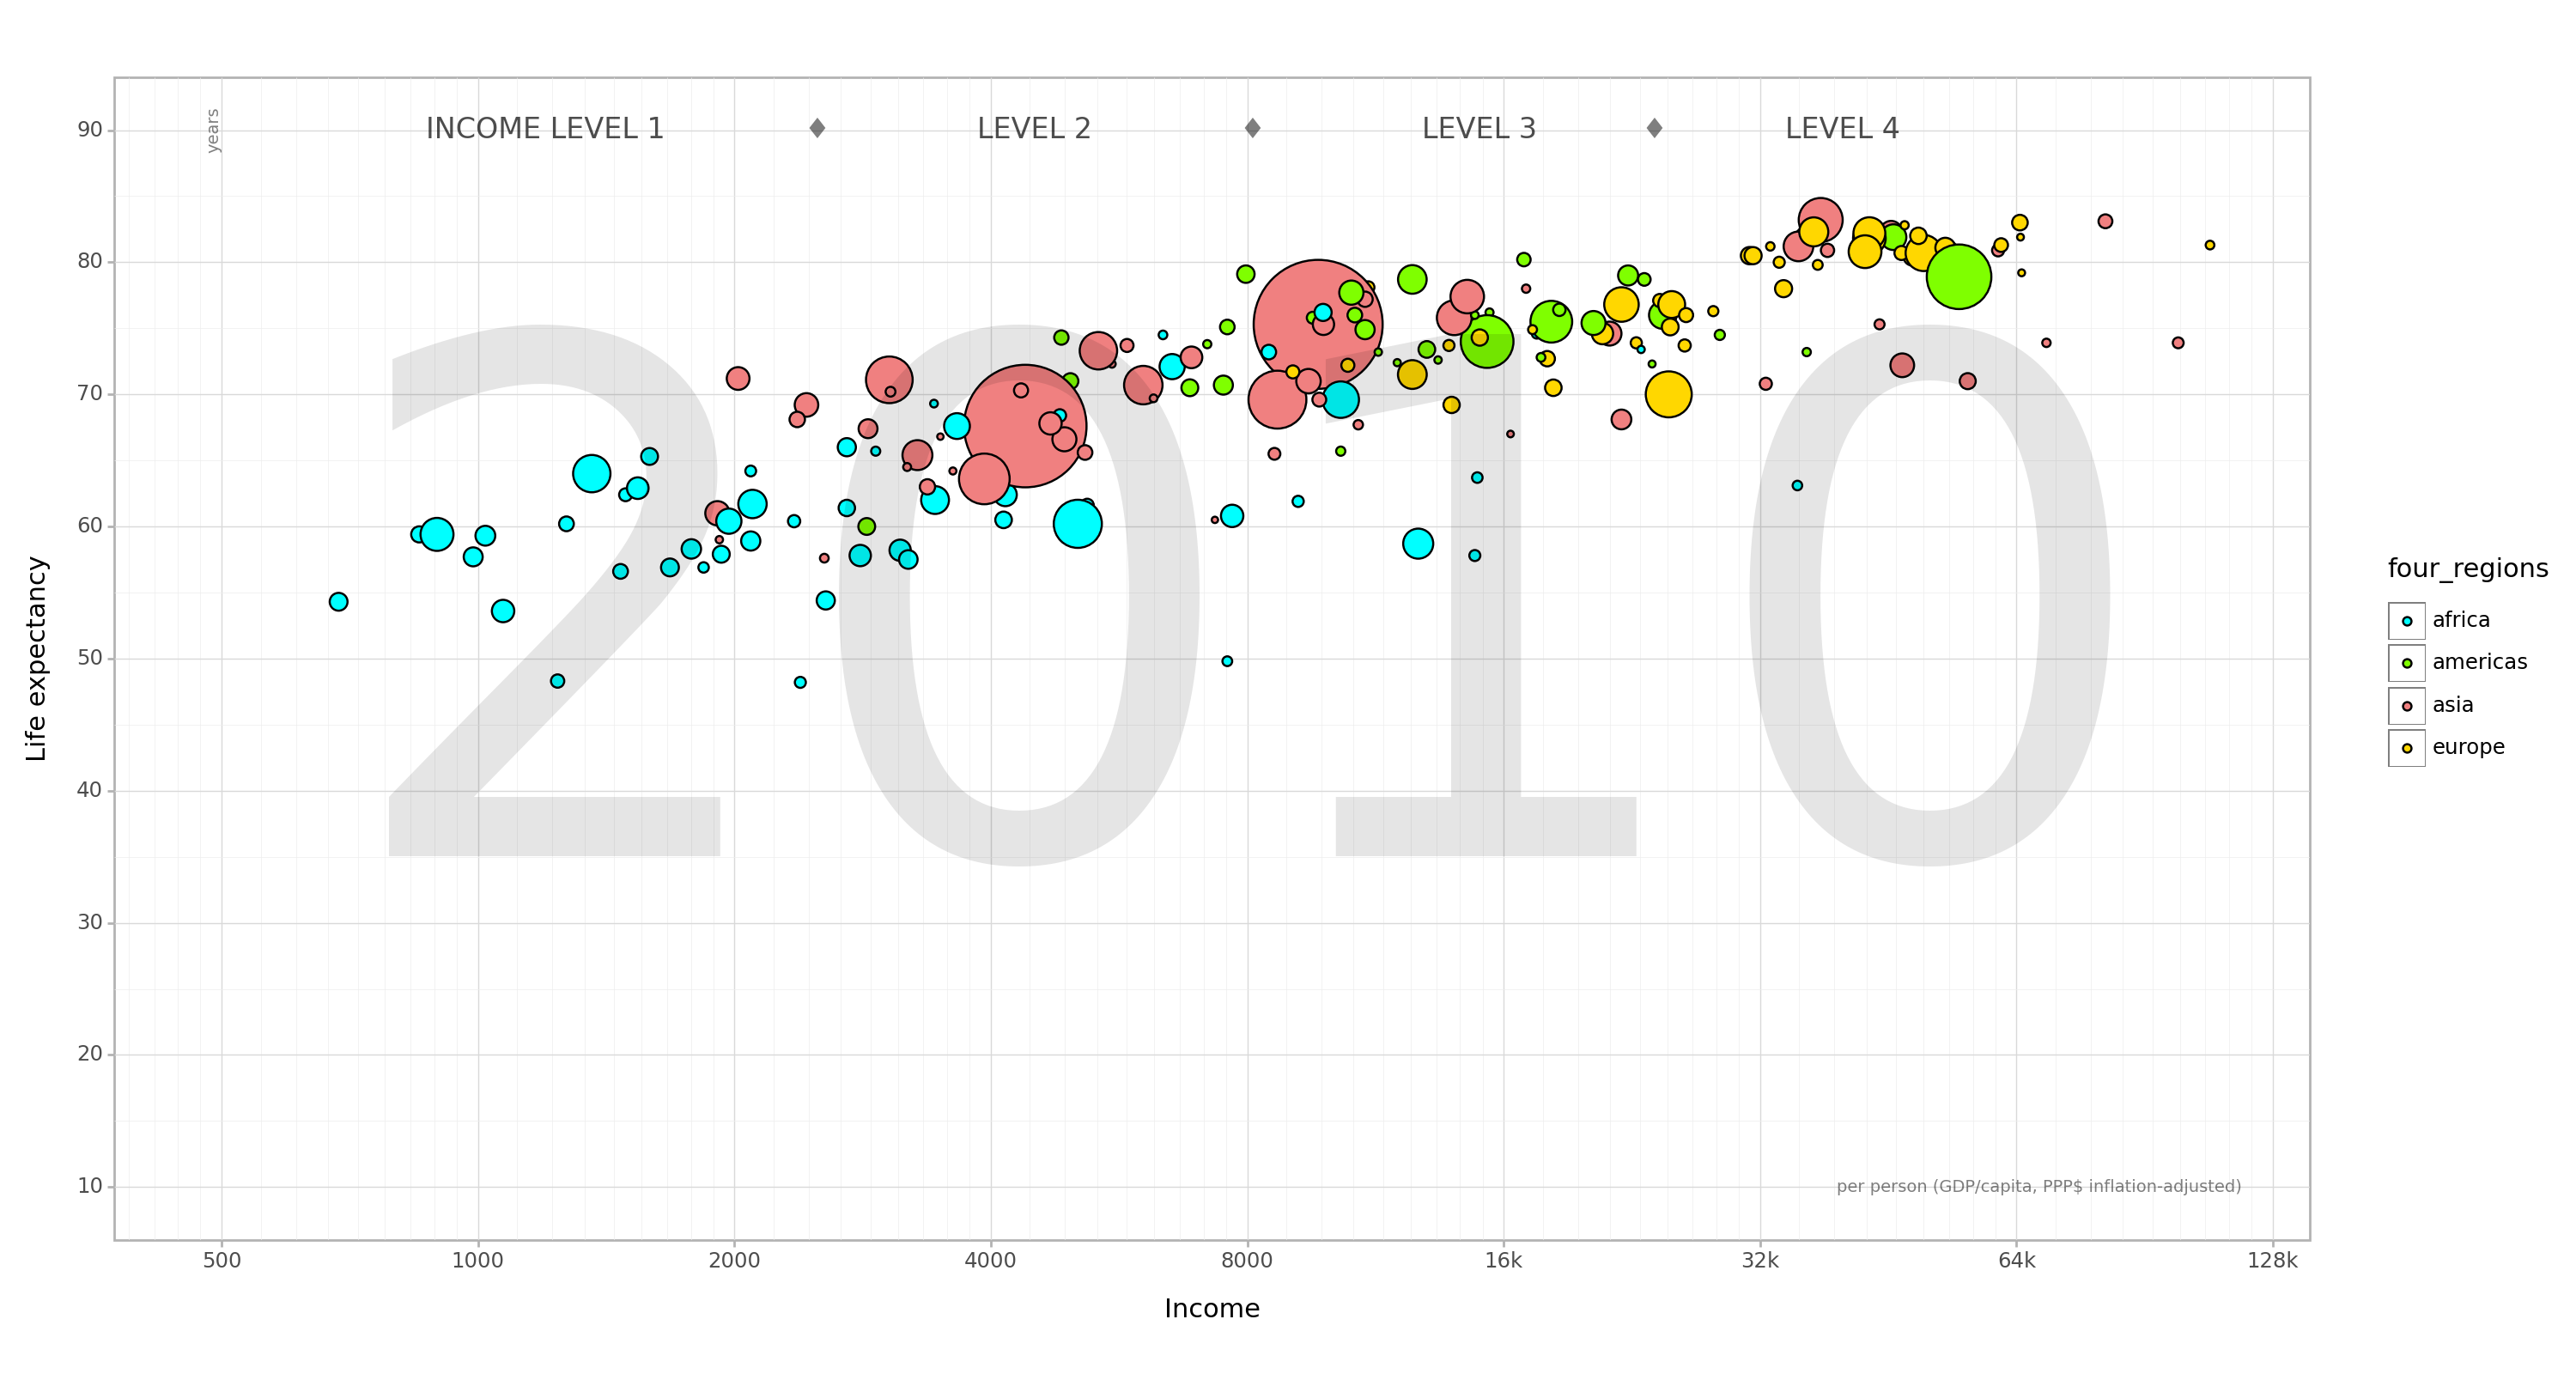

In [374]:
def custom_labels(breaks):
    # It kept setting my first x-axis tick mark to 499 and I couldn't figure out how to fix it so I just added it manually
    return ['500'] + [str(int(b)) if b < 16000 else f'{int(b // 1000)}k' for b in breaks[1:]]
breaks = [500 * (2 ** i) for i in range(0, 9)]

region_colors = {
    'africa': 'cyan',
    'americas': 'chartreuse',
    'asia': 'lightcoral',
    'europe': 'gold'
}

plot = (p9.ggplot(data=q1_df,
                  mapping=p9.aes(x='income',
                                 y='life_exp',
                                 size='population'))
        + p9.geom_point(p9.aes(fill='four_regions'), colour='black')
        + p9.annotate('text', x=8000, y=50, label='2010', size=300, ha='center', va='center', alpha=0.1)
        + p9.annotate('text', x=68000, y=10, label='per person (GDP/capita, PPP$ inflation-adjusted)', size=7, ha='center', va='center', alpha=0.5)
        + p9.annotate('text', x=490, y=90, label='years', size=7, ha='center', va='center', angle=90, alpha=0.5)
        + p9.annotate('text', x=1200, y=90, label='INCOME LEVEL 1', size=12, ha='center', va='center', alpha=0.7)
        + p9.annotate('text', x=2500, y=90, label='♦', size=12, ha='center', va='center', alpha=0.5)
        + p9.annotate('text', x=4500, y=90, label='LEVEL 2', size=12, ha='center', va='center', alpha=0.7)
        + p9.annotate('text', x=8100, y=90, label='♦', size=12, ha='center', va='center', alpha=0.5)
        + p9.annotate('text', x=15000, y=90, label='LEVEL 3', size=12, ha='center', va='center', alpha=0.7)
        + p9.annotate('text', x=24000, y=90, label='♦', size=12, ha='center', va='center', alpha=0.5)
        + p9.annotate('text', x=40000, y=90, label='LEVEL 4', size=12, ha='center', va='center', alpha=0.7)
        + p9.labs(x="Income",
                  y="Life expectancy",
                  color="World Regions")
        + p9.scale_fill_manual(values=region_colors)
        + p9.scale_x_log10(breaks=breaks, labels=custom_labels)
        + p9.scale_y_continuous(breaks=range(10, 91, 10), limits=(10, 90))
        + p9.scale_size(range=(1, 30))
        + p9.guides(size=False)
        + p9.theme_light()
        + p9.theme(figure_size=(15, 8)))

plot.draw()

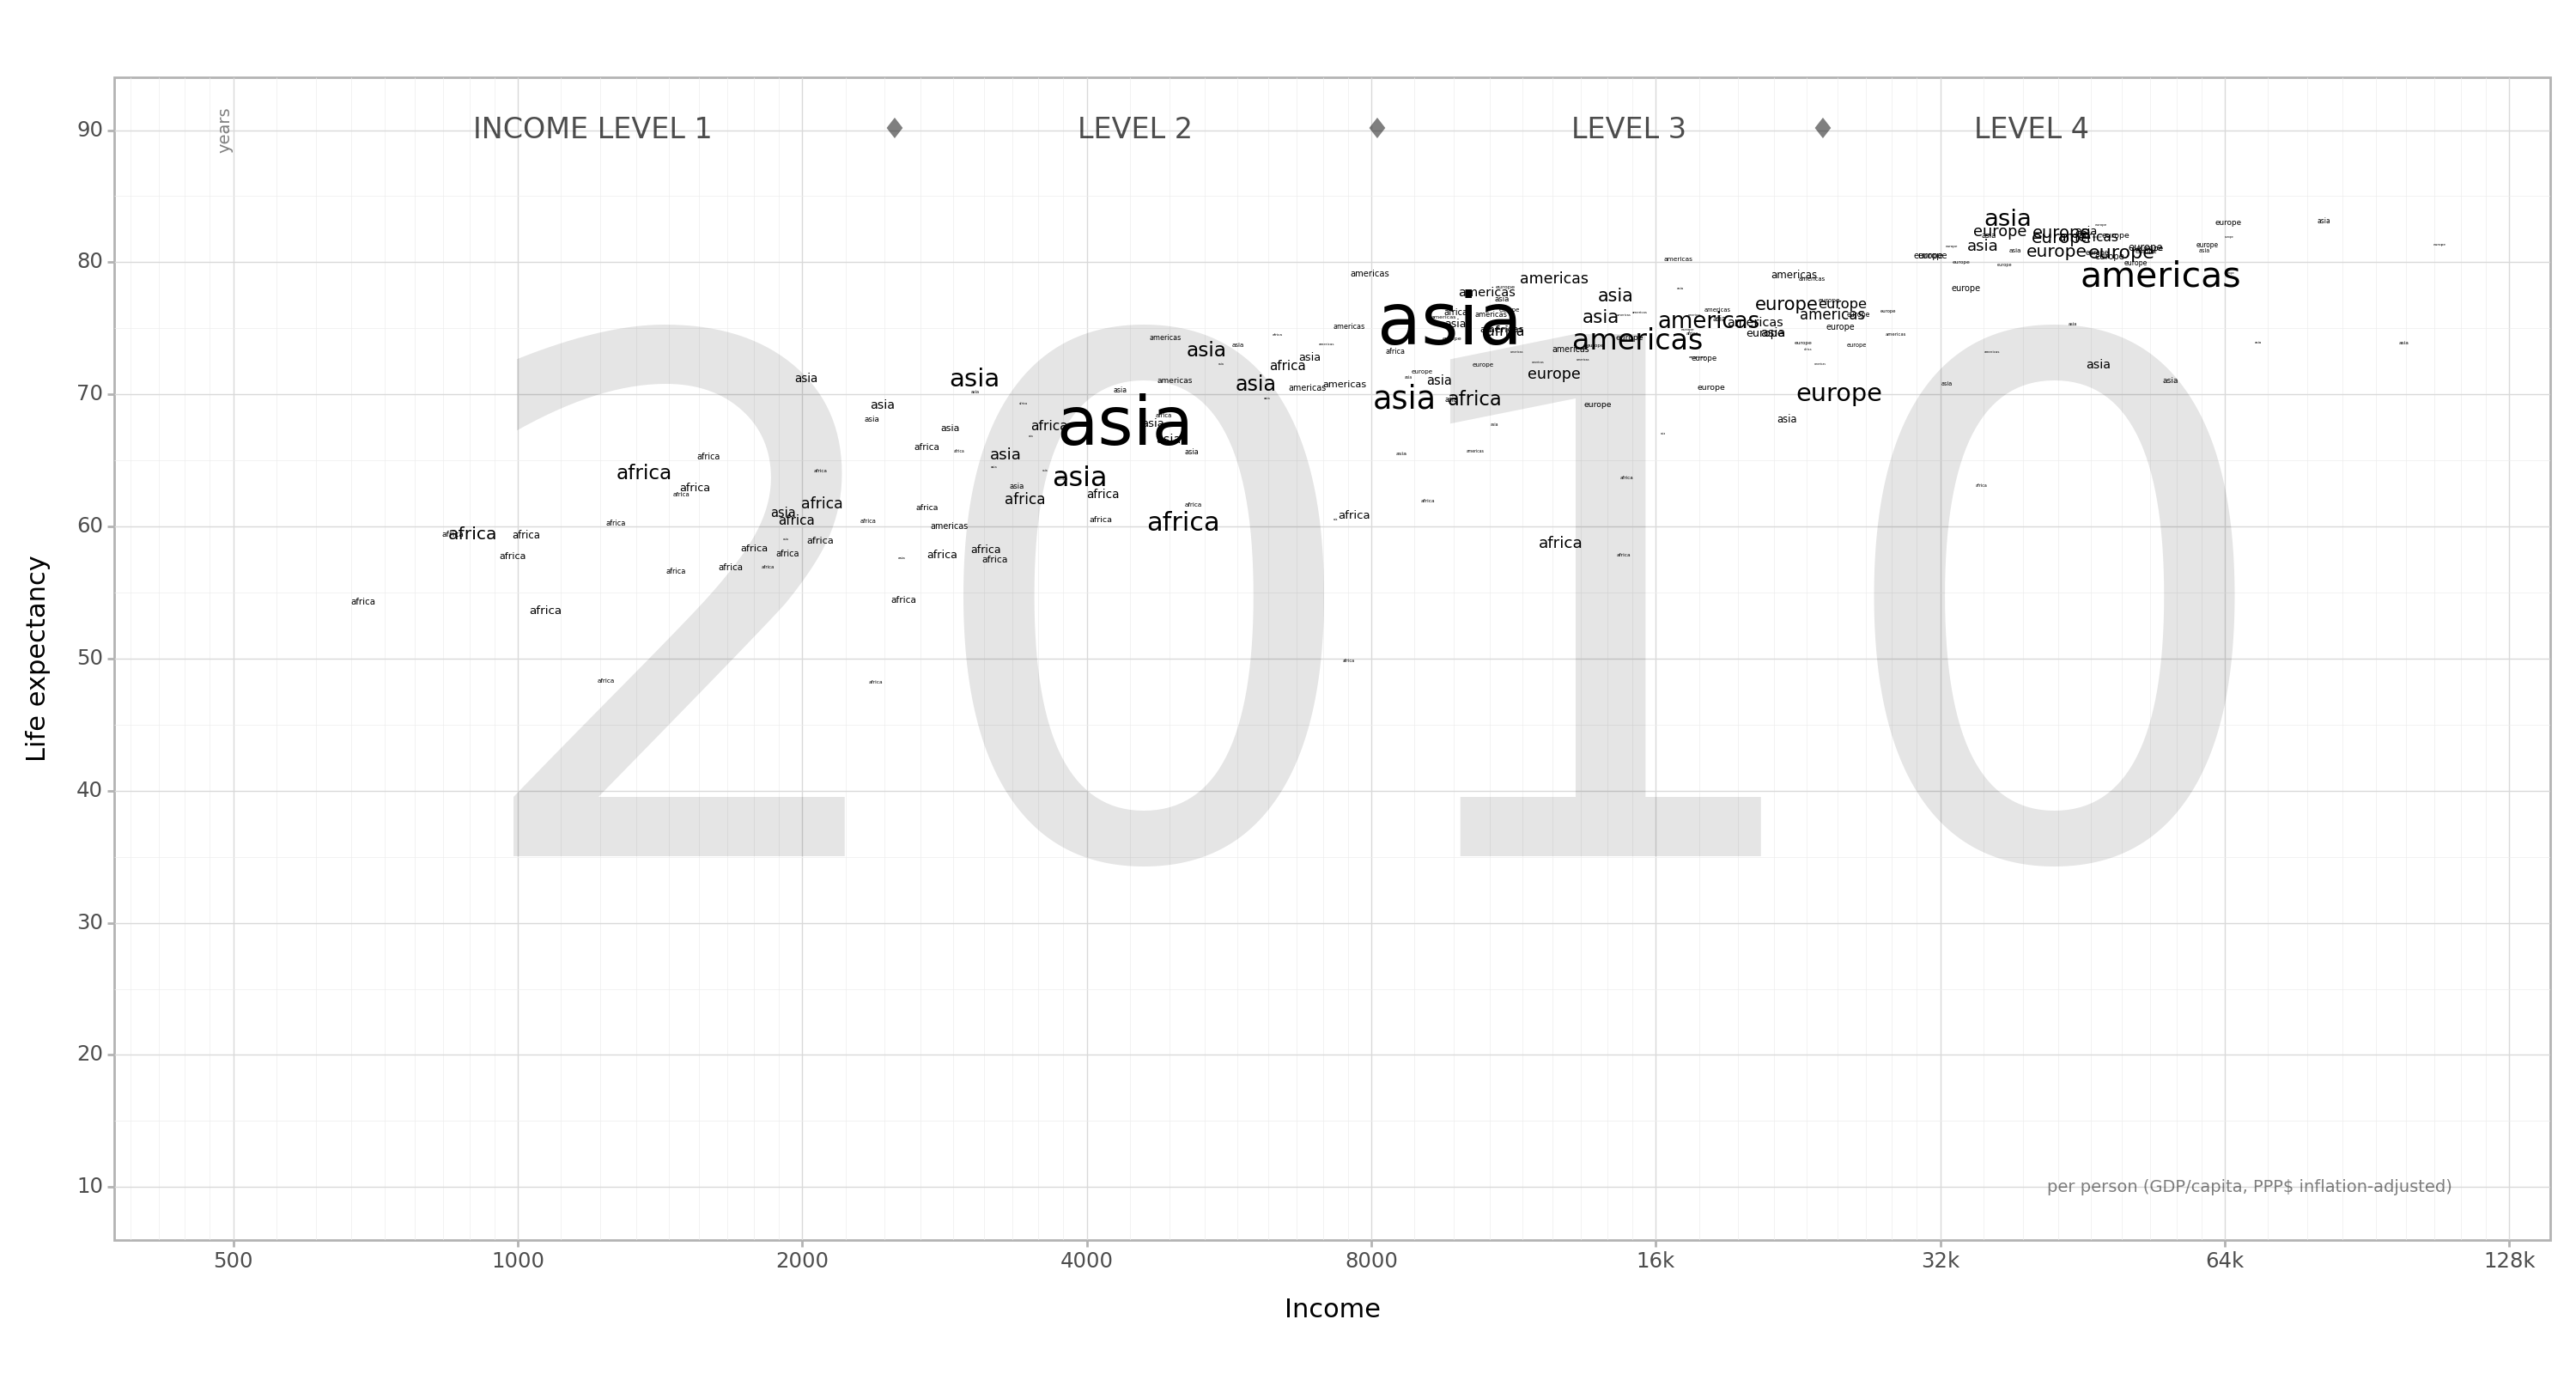

In [375]:
plot = (p9.ggplot(data=q1_df,
                 mapping=p9.aes(x='income',
                                y='life_exp',
                                size='population'))
        + p9.geom_text(mapping=p9.aes(label='four_regions'))
        + p9.annotate('text', x=8000, y=50, label='2010', size=300, ha='center', va='center', alpha=0.1)
        + p9.annotate('text', x=68000, y=10, label='per person (GDP/capita, PPP$ inflation-adjusted)', size=7, ha='center', va='center', alpha=0.5)
        + p9.annotate('text', x=490, y=90, label='years', size=7, ha='center', va='center', angle=90, alpha=0.5)
        + p9.annotate('text', x=1200, y=90, label='INCOME LEVEL 1', size=12, ha='center', va='center', alpha=0.7)
        + p9.annotate('text', x=2500, y=90, label='♦', size=12, ha='center', va='center', alpha=0.5)
        + p9.annotate('text', x=4500, y=90, label='LEVEL 2', size=12, ha='center', va='center', alpha=0.7)
        + p9.annotate('text', x=8100, y=90, label='♦', size=12, ha='center', va='center', alpha=0.5)
        + p9.annotate('text', x=15000, y=90, label='LEVEL 3', size=12, ha='center', va='center', alpha=0.7)
        + p9.annotate('text', x=24000, y=90, label='♦', size=12, ha='center', va='center', alpha=0.5)
        + p9.annotate('text', x=40000, y=90, label='LEVEL 4', size=12, ha='center', va='center', alpha=0.7)
        + p9.labs(x="Income",
                  y="Life expectancy",
                  size="Population")
        + p9.scale_x_log10(breaks=breaks, labels=custom_labels)
        + p9.scale_y_continuous(breaks=range(10, 91, 10), limits=(10, 90))
        + p9.scale_size(range=(1, 30))
        + p9.guides(size=False)
        + p9.theme_light()
        + p9.theme(figure_size=(15, 8)))

plot.draw()

The geom_text is basically the same as geom_point, but the colors of the regions and the points have turned into the names of the regions themselves. It makes it look cooler (in my humble opinion) and easier to differentiate the regions of countiries with large populations, but the countries with smaller populations are basically impossible to differentiate. I prefer the geom_point to this geom_text.

## Task 2

x: Exports\
y: Imports\
color: World regions\
size: Energy use

In [376]:
q2_df = pd.read_csv("./Data/q2data.csv")
missing = q2_df[q2_df[['imports', 'exports', 'energy']].isna().any(axis=1)]
q2_df.drop(missing.index, inplace=True)
q2_df[q2_df.isna().any(axis=1)]

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
136,53.3,23.3,1440,1997,North Macedonia,NaN,NaN,NaN,NaN


In [377]:
# Impute missing values
q2_df.loc[q2_df['country'] == 'North Macedonia', 'four_regions'] = 'europe'

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/scales/scale_size.py:49: PlotnineWarning: Using size for a discrete variable is not advised.


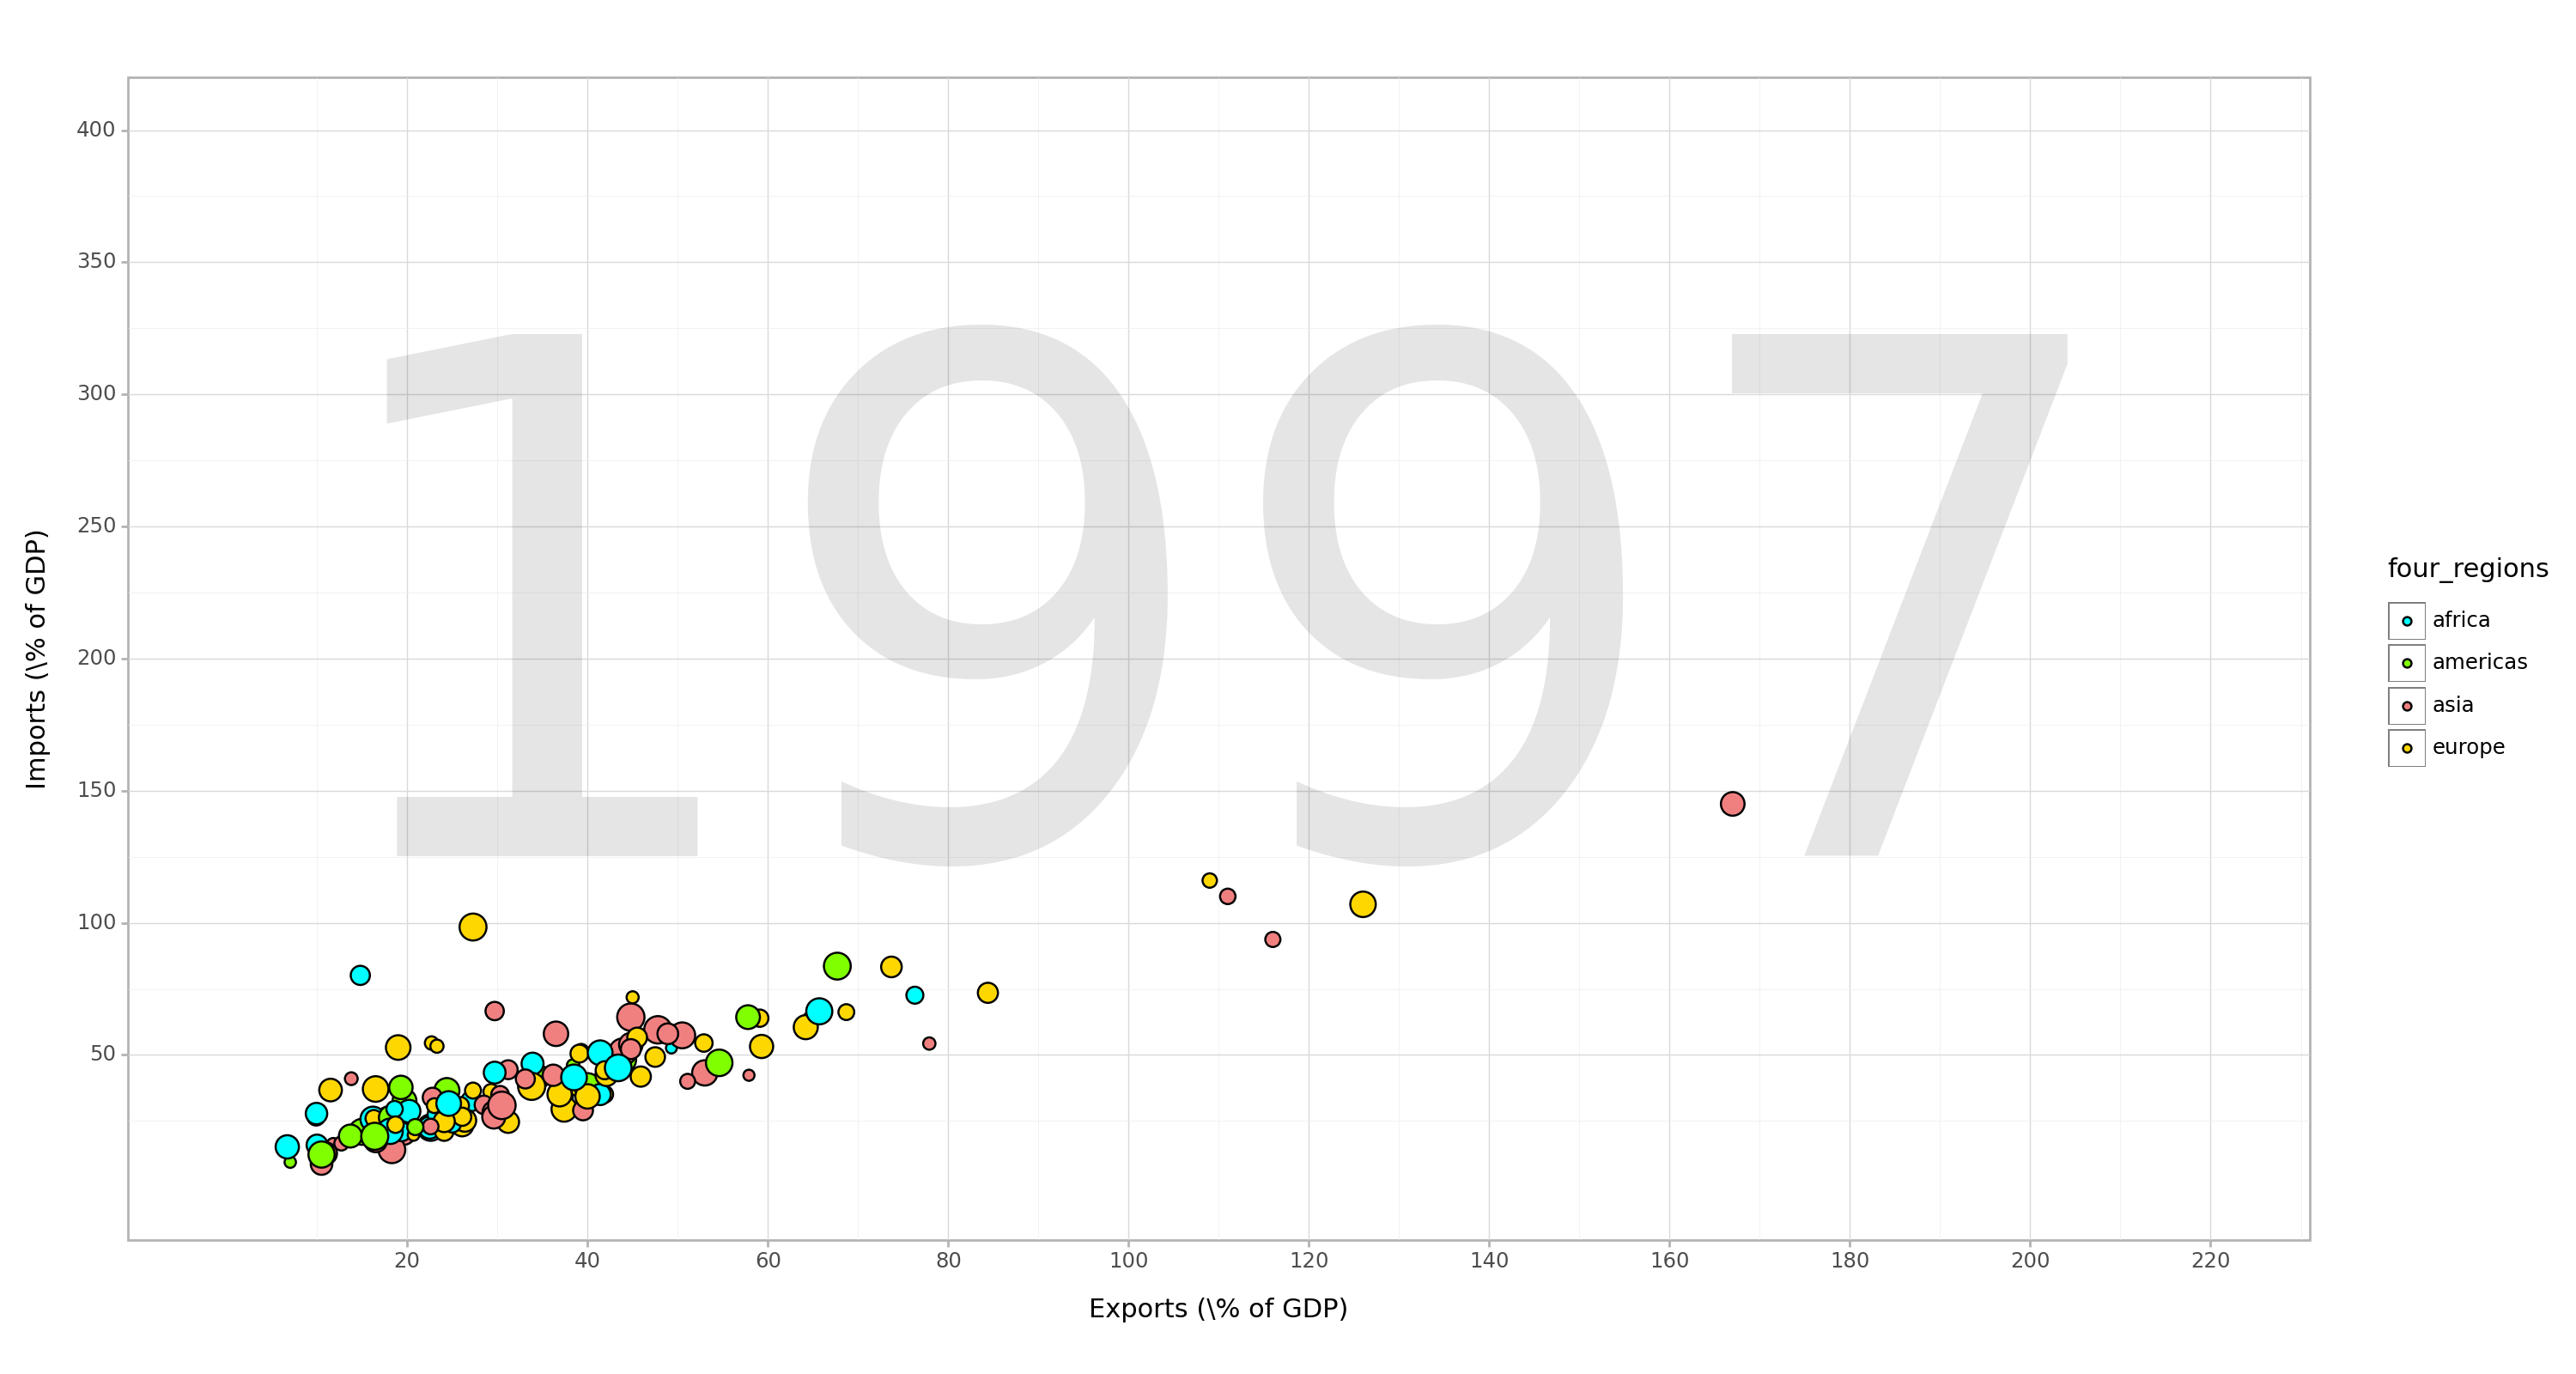

In [378]:
plot = (p9.ggplot(data=q2_df,
                  mapping=p9.aes(x='exports',
                                 y='imports',
                                 size='energy'))
        + p9.geom_point(p9.aes(fill='four_regions'), colour='black')
        + p9.annotate('text', x=110, y=200, label='1997', size=300, ha='center', va='center', alpha=0.1)
        + p9.labs(x="Exports (\% of GDP)",
                  y="Imports (\% of GDP)",
                  color="World Regions")
        + p9.scale_x_continuous(breaks=range(20, 221, 20), limits=(0, 220))
        + p9.scale_y_continuous(breaks=range(50, 401, 50), limits=(0, 400))
        + p9.scale_fill_manual(values=region_colors)
        + p9.guides(size=False)
        + p9.theme_light()
        + p9.theme(figure_size=(15, 8)))

plot.draw()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/positions/position.py:229: PlotnineWarning: position_dodge requires non-overlapping x intervals


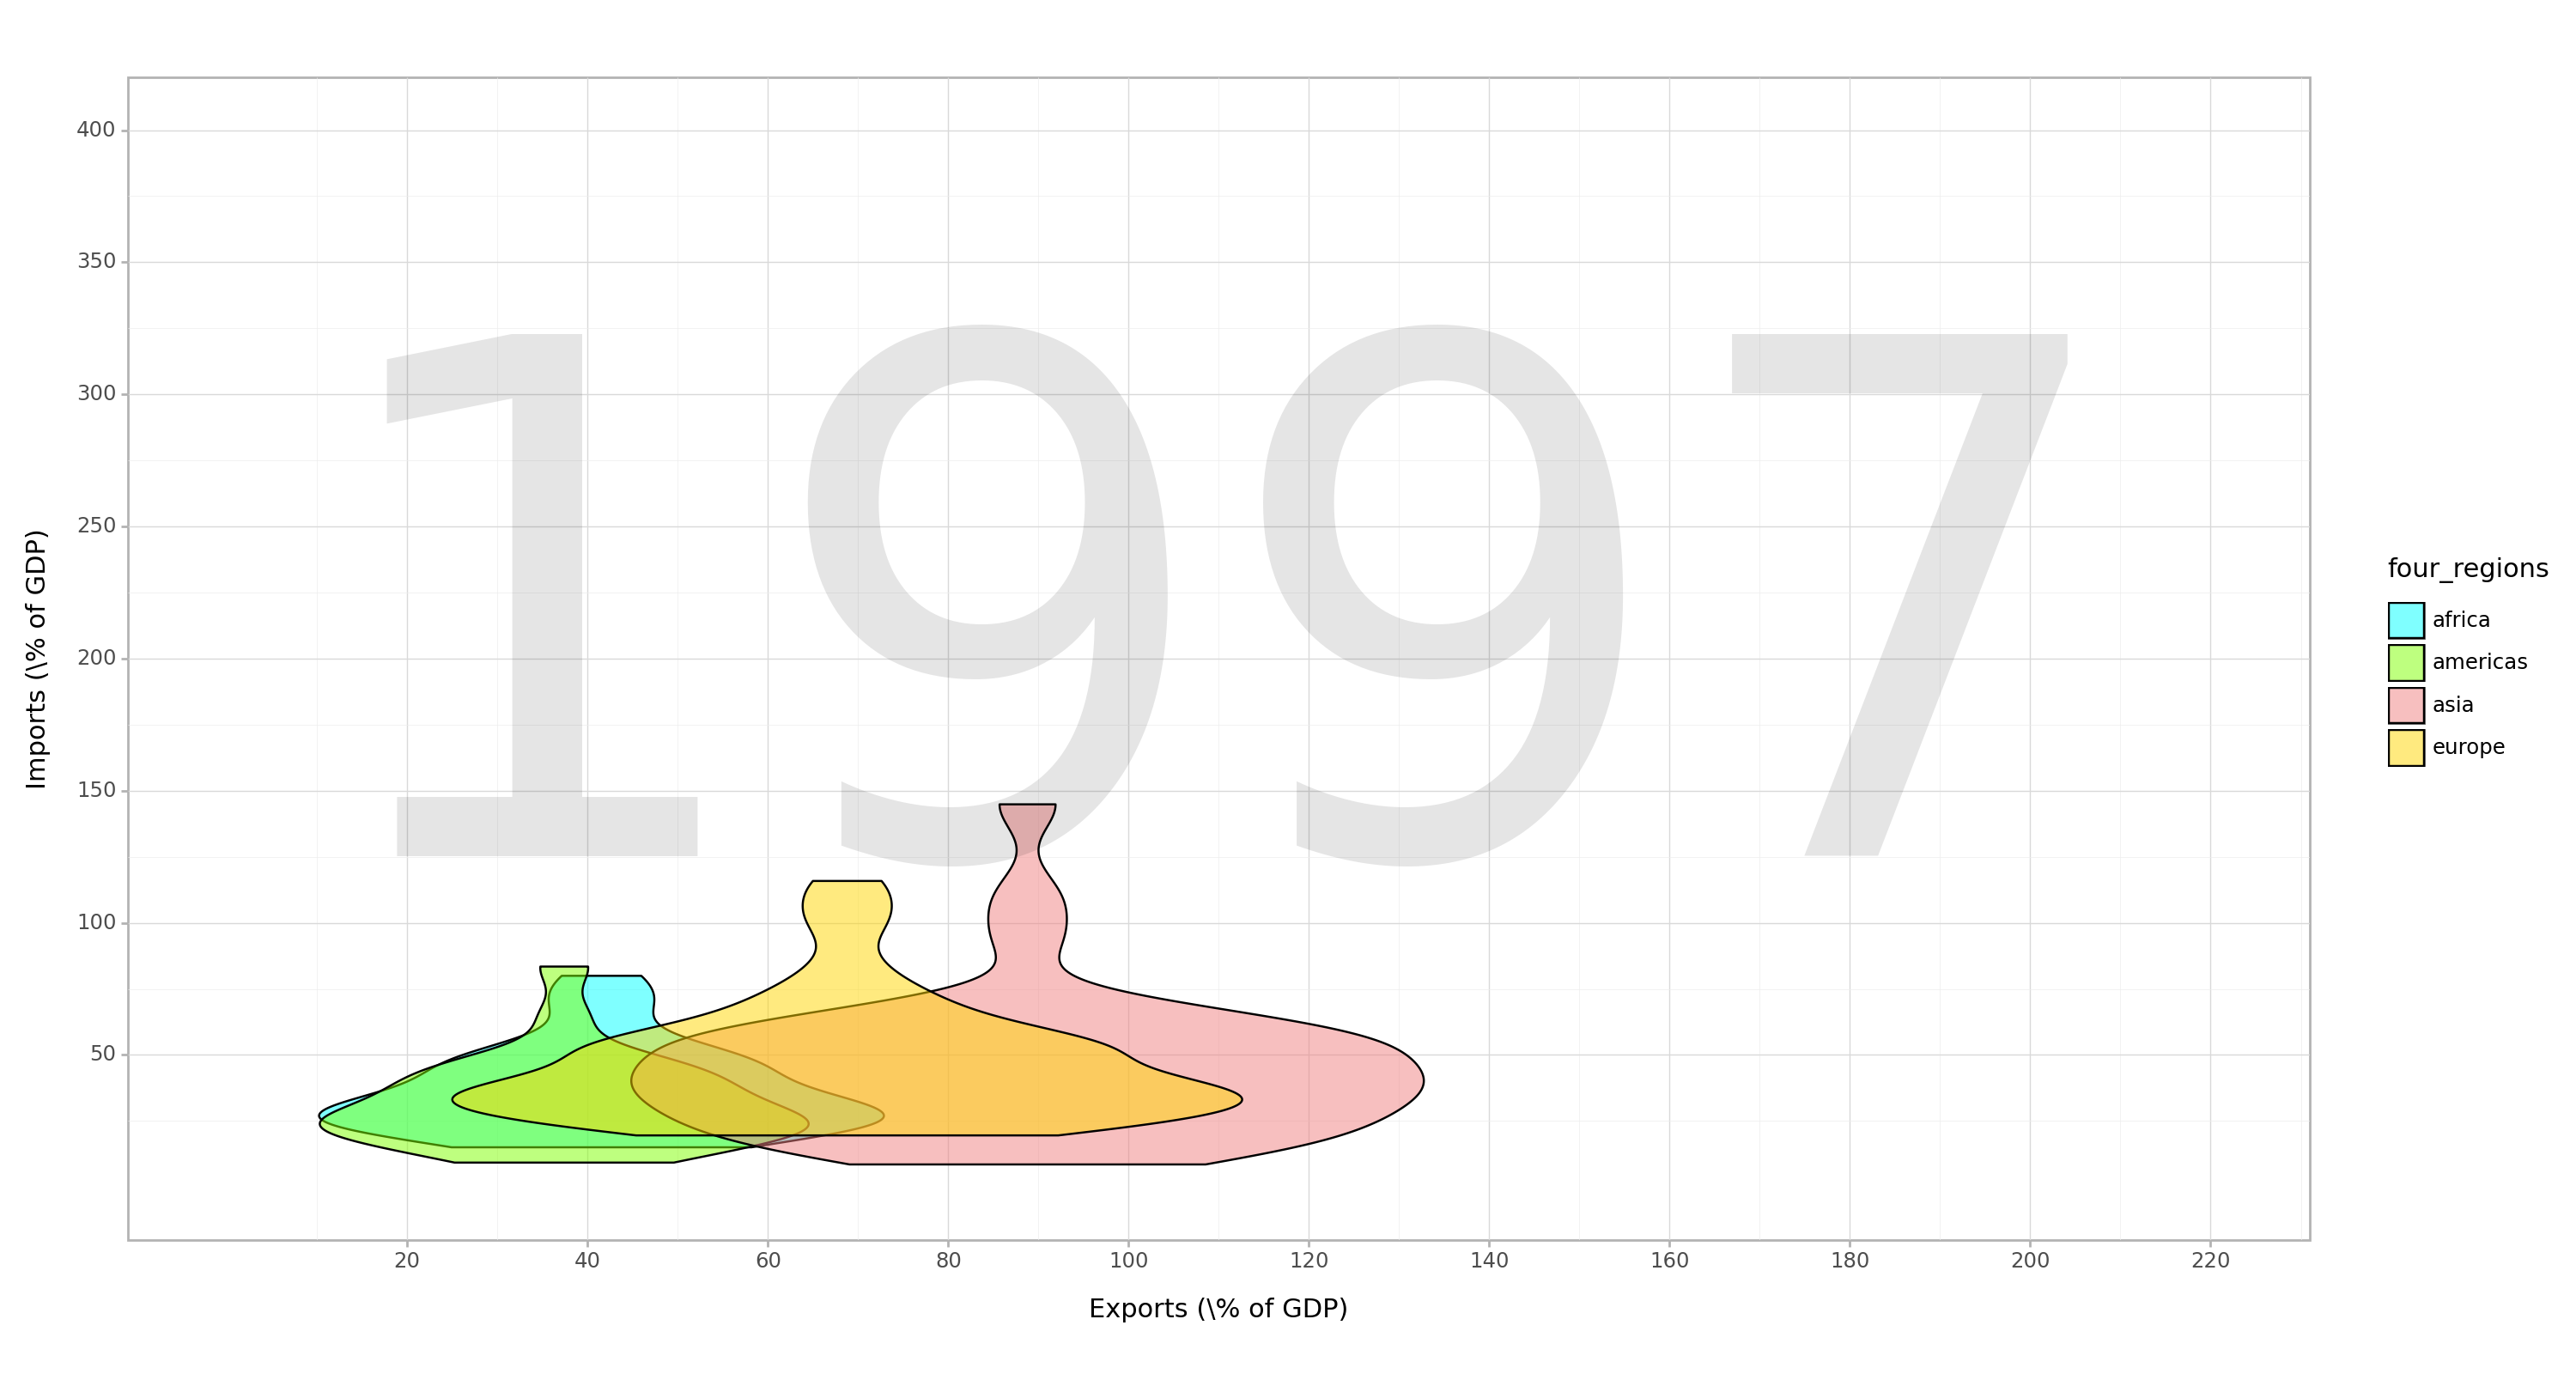

In [379]:
plot = (p9.ggplot(data=q2_df,
                  mapping=p9.aes(x='exports',
                                 y='imports'))
        + p9.geom_violin(p9.aes(fill='four_regions'), colour='black', alpha=0.5)
        + p9.annotate('text', x=110, y=200, label='1997', size=300, ha='center', va='center', alpha=0.1)
        + p9.labs(x="Exports (\% of GDP)",
                  y="Imports (\% of GDP)",
                  color="World Regions")
        + p9.scale_x_continuous(breaks=range(20, 221, 20), limits=(0, 220))
        + p9.scale_y_continuous(breaks=range(50, 401, 50), limits=(0, 400))
        + p9.scale_fill_manual(values=region_colors)
        + p9.guides(size=False)
        + p9.theme_light()
        + p9.theme(figure_size=(15, 8)))

plot.draw()

The geom_violin is very different from the geom_point, as it shows a distribution of values rather than the actual values themselves. With geom_violin, I am also not able to incorporate energy use in the size. Overall, geom_point is much more versatile, but geom_violin is good if you want a clearer view of the distribution of points.

## Task 3

x: Individuals using the internet\
y: GDP/capita\
color: World regions\
size: Income

In [380]:
q3_df = pd.read_csv("./Data/q3data.csv")
missing = q3_df[q3_df[['internet_users', 'gdp', 'income']].isna().any(axis=1)]
q3_df.drop(missing.index, inplace=True)
q3_df[q3_df.isna().any(axis=1)]

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
62,1.82,3240.0,5810.0,2001,Eswatini,NaN,NaN,NaN,NaN
143,17.30,3370.0,9980.0,2001,North Macedonia,NaN,NaN,NaN,NaN


In [381]:
# Impute missing values
q3_df.loc[q3_df['country'] == 'Eswatini', 'four_regions'] = 'africa'
q3_df.loc[q3_df['country'] == 'North Macedonia', 'four_regions'] = 'europe'

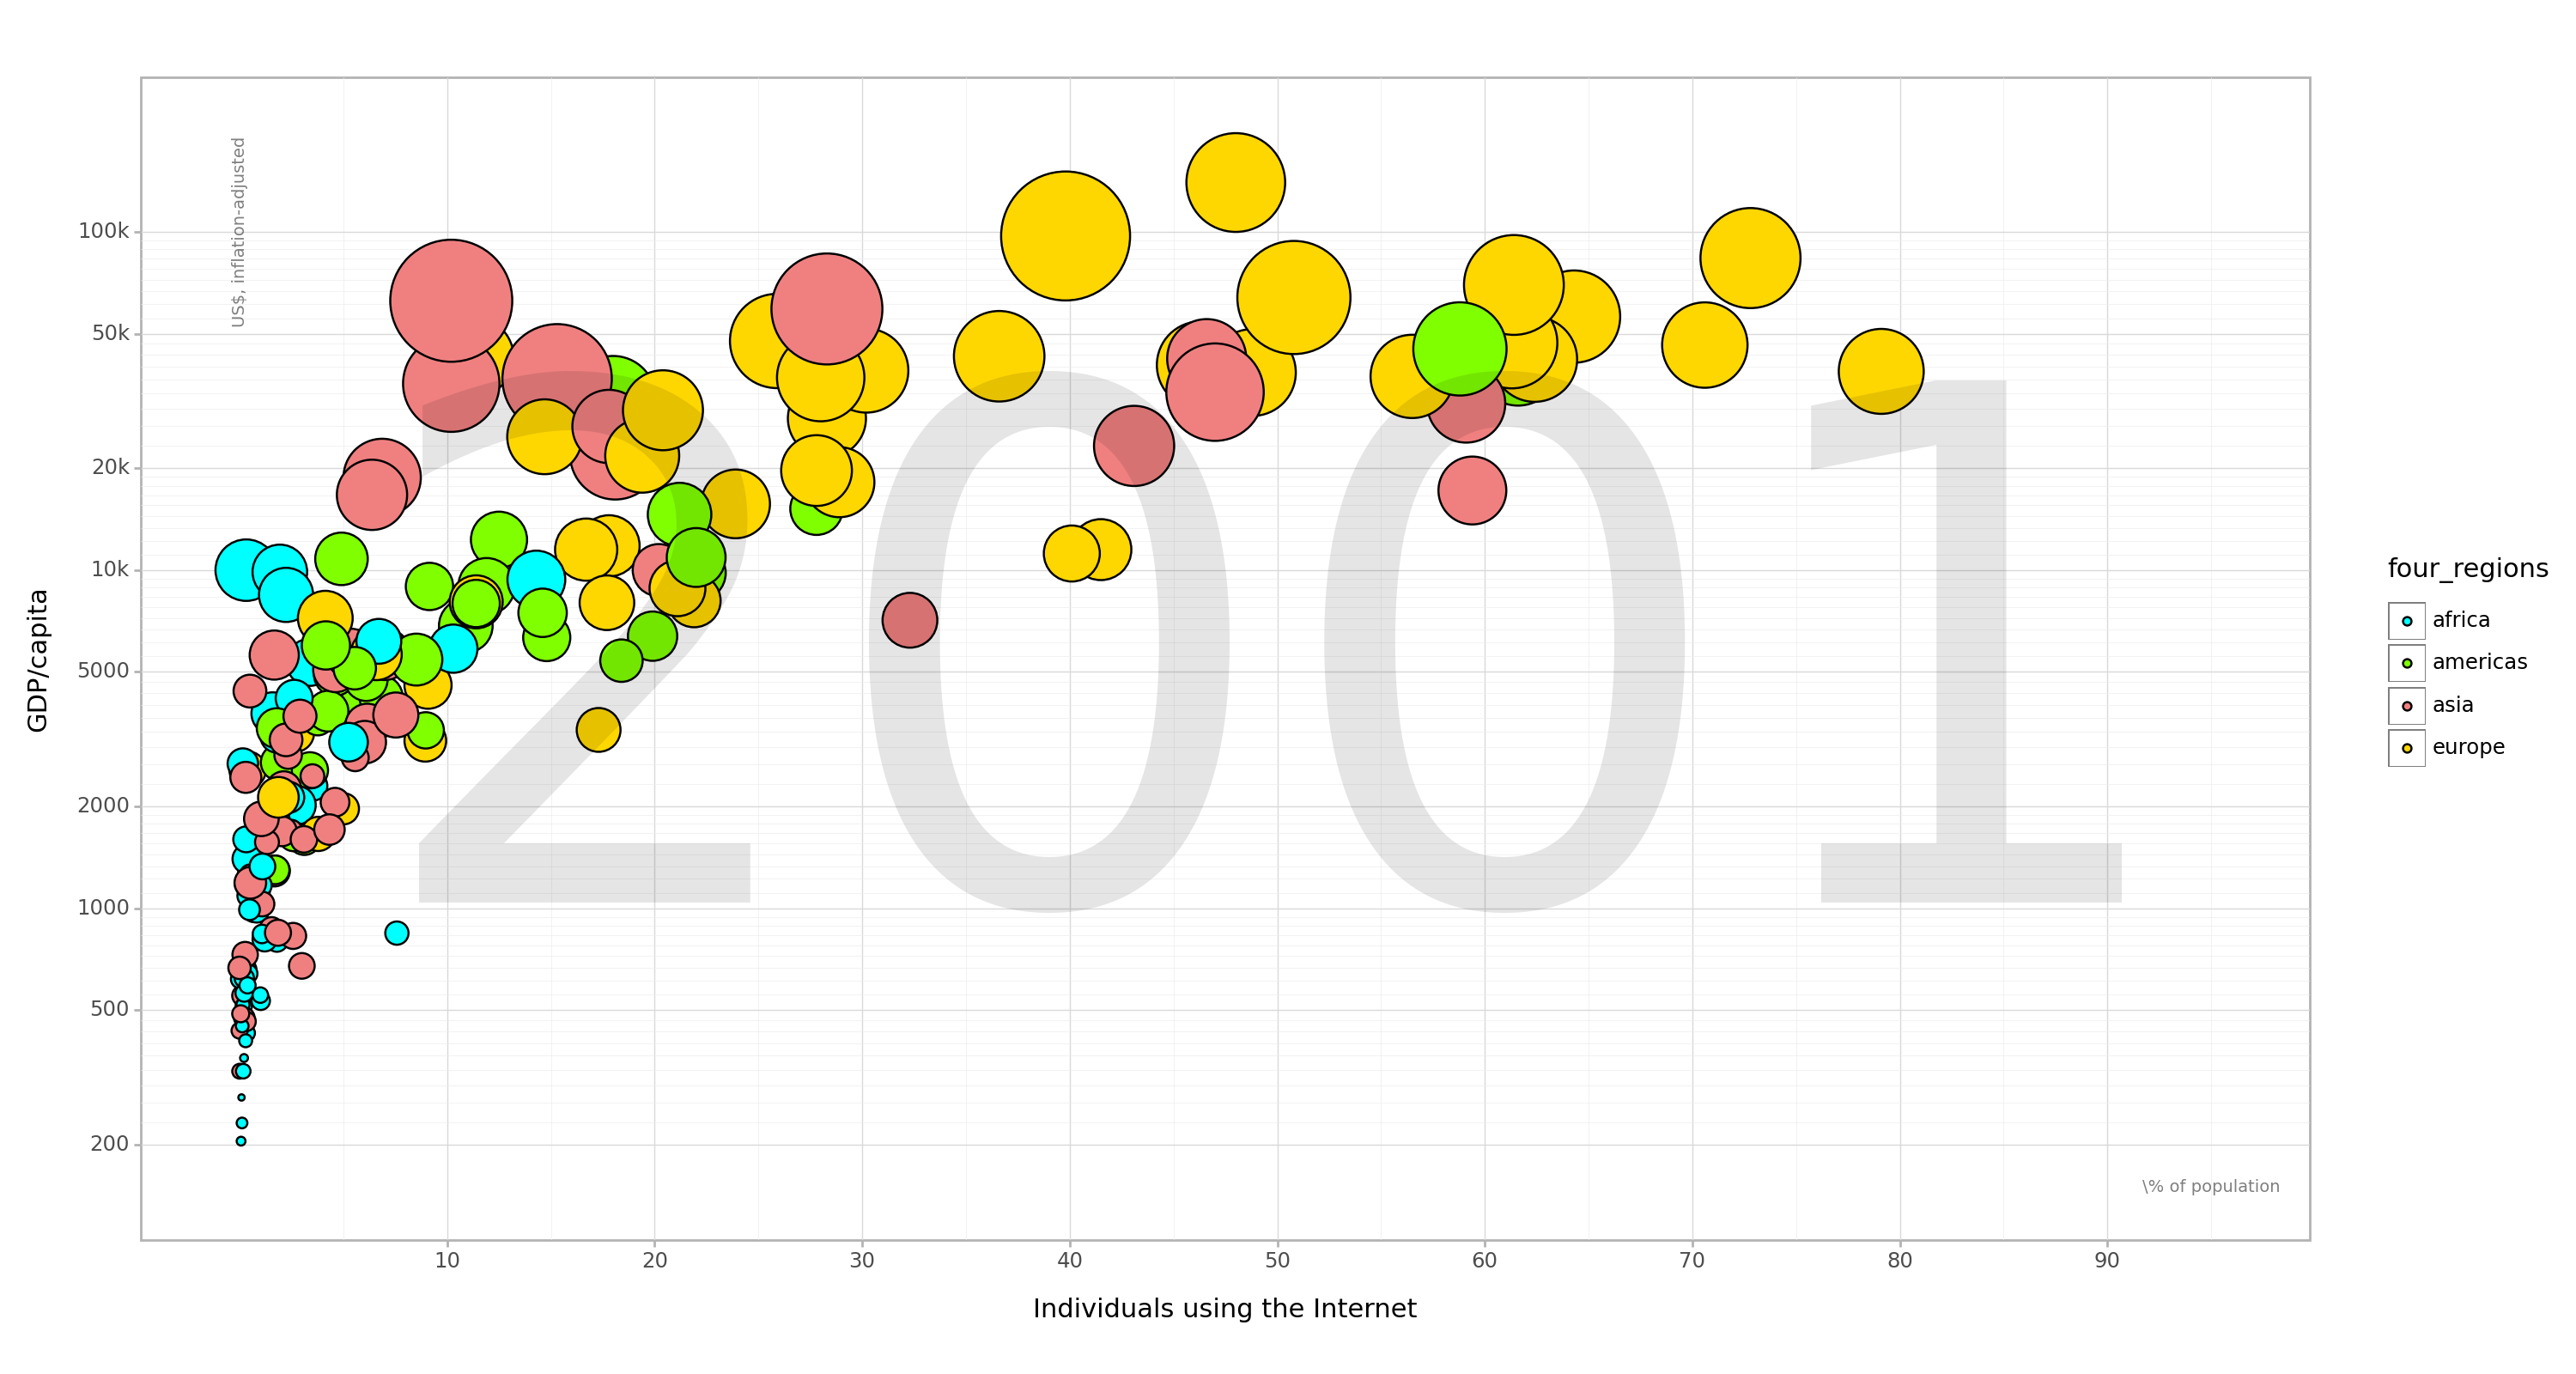

In [382]:
labels = ['200', '500', '1000', '2000', '5000', '10k', '20k', '50k', '100k']
breaks = [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]

plot = (p9.ggplot(data=q3_df,
                  mapping=p9.aes(x='internet_users',
                                 y='gdp',
                                 size='income'))
        + p9.geom_point(p9.aes(fill='four_regions'), colour='black')
        + p9.annotate('text', x=50, y=4000, label='2001', size=300, ha='center', va='center', alpha=0.1)
        + p9.annotate('text', x=95, y=150, label='\% of population', size=7, ha='center', va='center', alpha=0.5)
        + p9.annotate('text', x=0, y=100000, label='US$, inflation-adjusted', size=7, ha='center', va='center', angle=90, alpha=0.5)
        + p9.labs(x="Individuals using the Internet",
                  y="GDP/capita",
                  color="World Regions")
        + p9.scale_x_continuous(breaks=range(10, 91, 10), limits=(0, 95))
        + p9.scale_y_log10(breaks=breaks, labels=labels, limits=(150, 200000))
        + p9.scale_fill_manual(values=region_colors)
        + p9.scale_size(range=(1, 30))
        + p9.guides(size=False)
        + p9.theme_light()
        + p9.theme(figure_size=(15, 8)))

plot.draw()

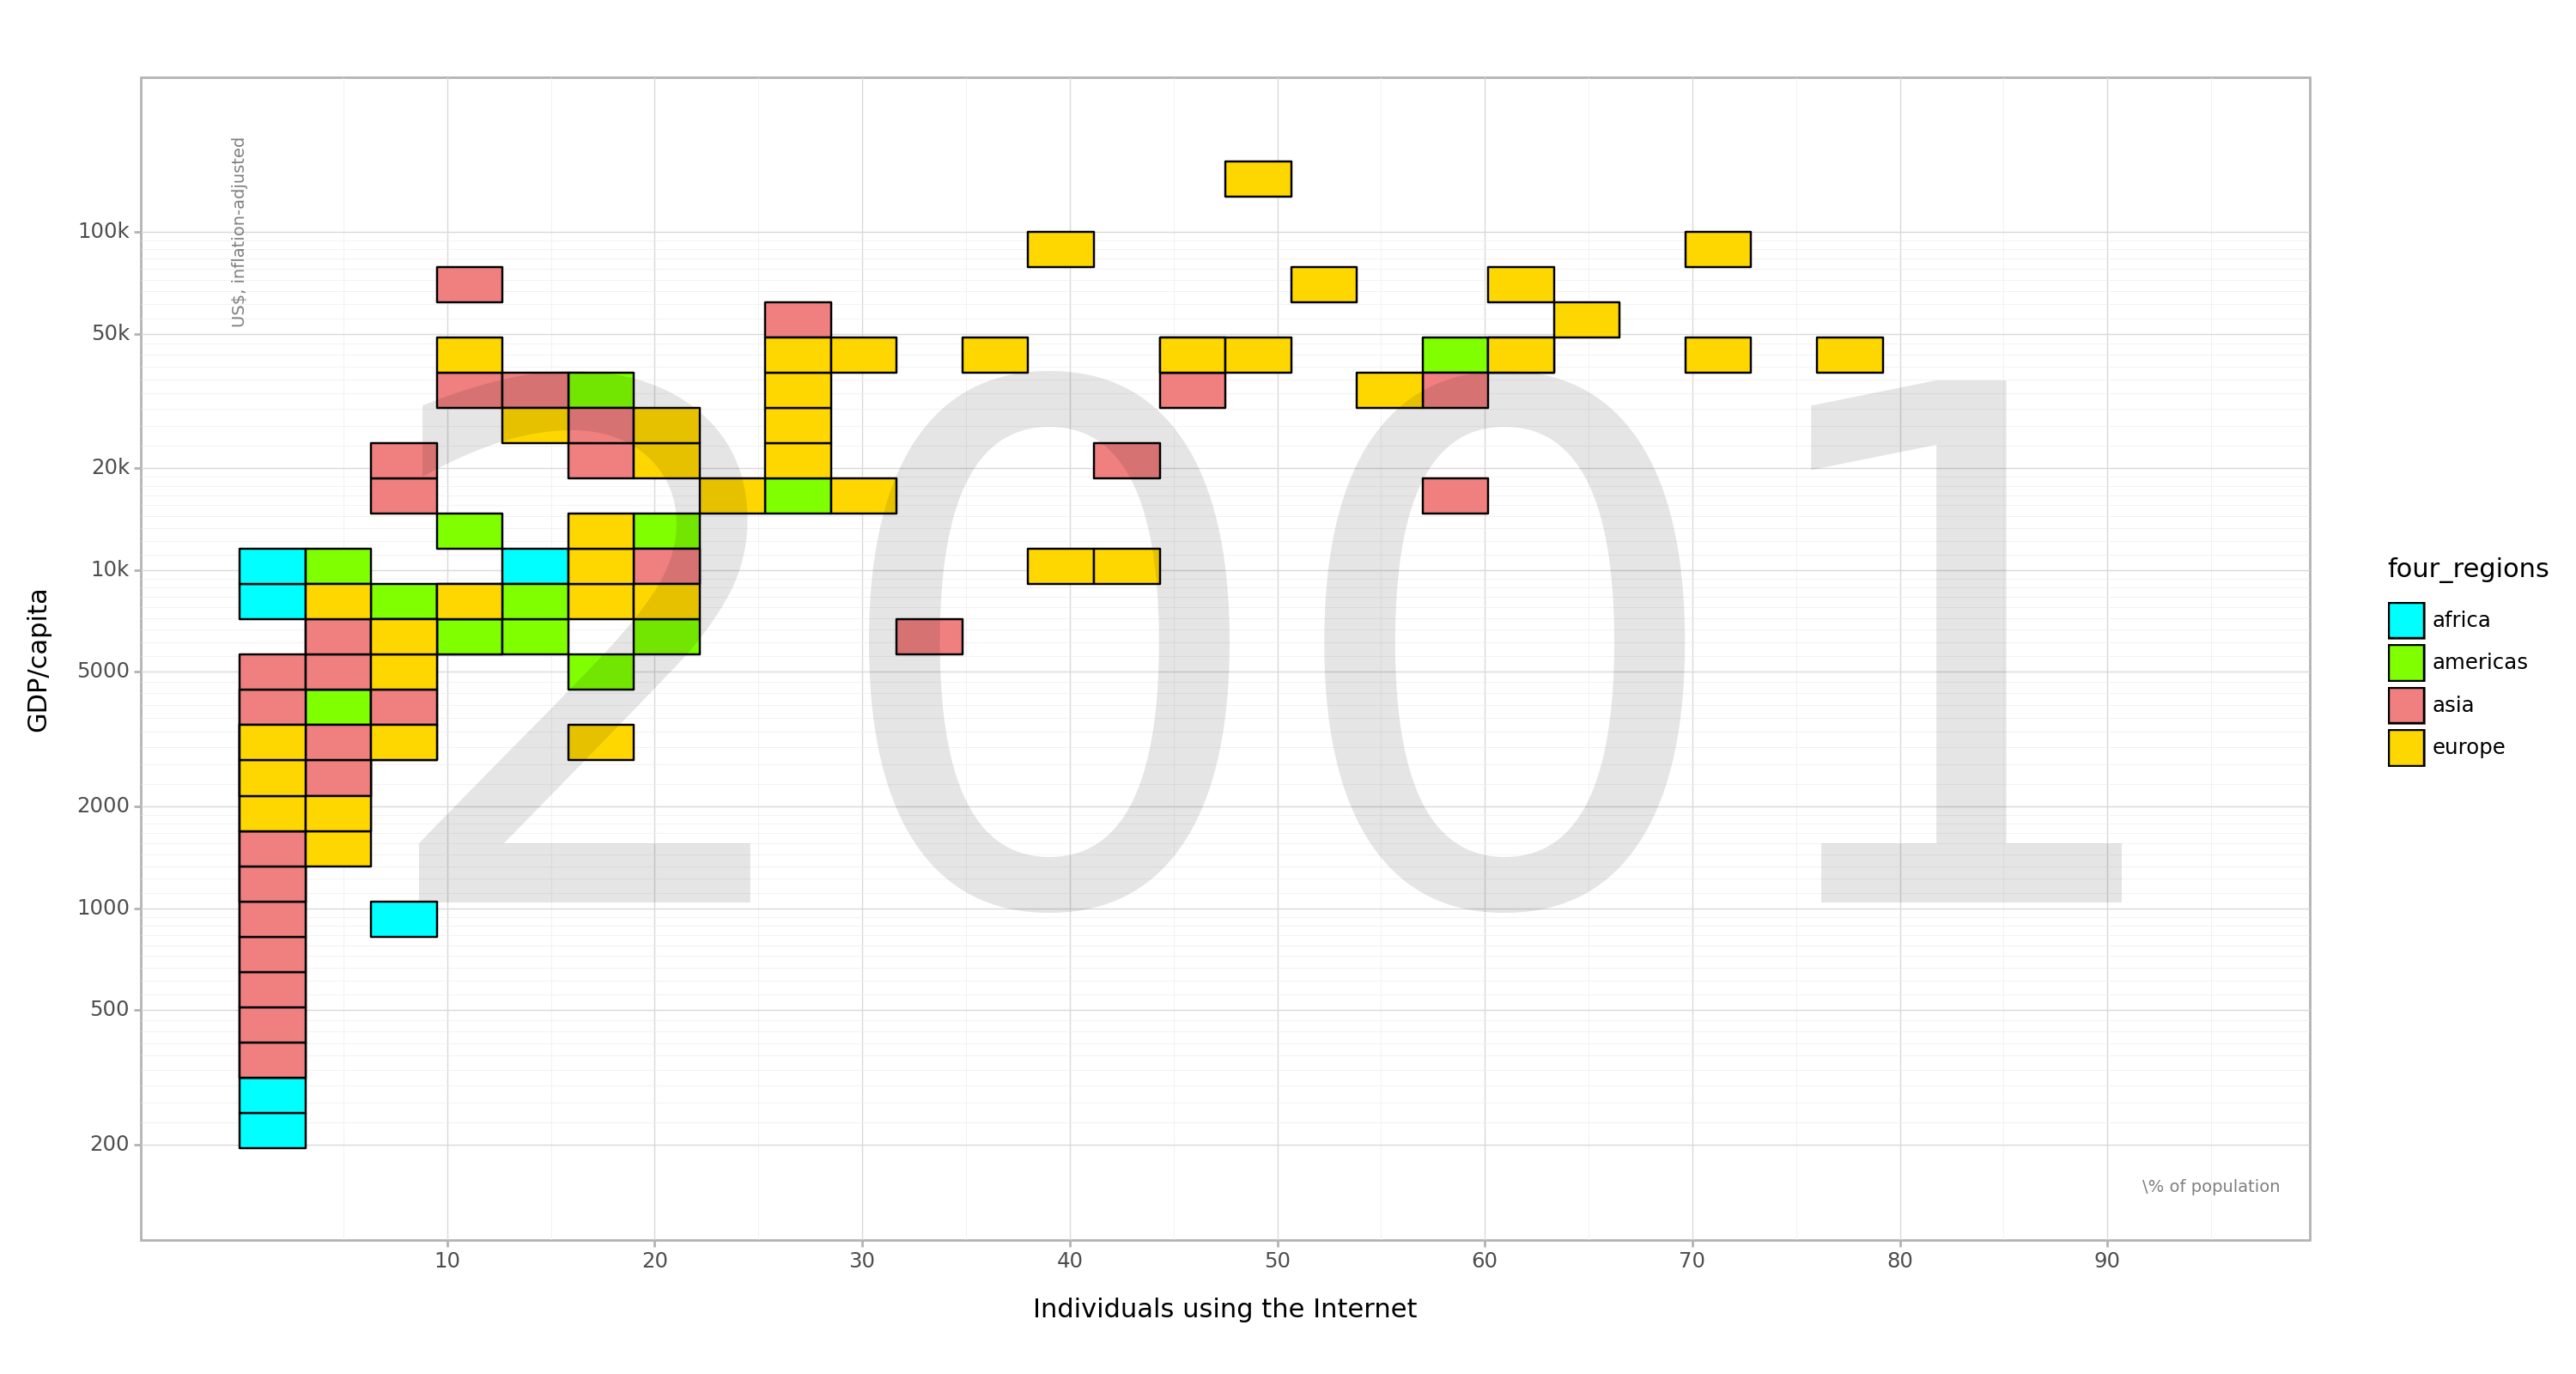

In [383]:
plot = (p9.ggplot(data=q3_df,
                  mapping=p9.aes(x='internet_users',
                                 y='gdp'))
        + p9.geom_bin2d(p9.aes(fill='four_regions'), colour='black')
        + p9.annotate('text', x=50, y=4000, label='2001', size=300, ha='center', va='center', alpha=0.1)
        + p9.annotate('text', x=95, y=150, label='\% of population', size=7, ha='center', va='center', alpha=0.5)
        + p9.annotate('text', x=0, y=100000, label='US$, inflation-adjusted', size=7, ha='center', va='center', angle=90, alpha=0.5)
        + p9.labs(x="Individuals using the Internet",
                  y="GDP/capita",
                  color="World Regions")
        + p9.scale_x_continuous(breaks=range(10, 91, 10), limits=(0, 95))
        + p9.scale_y_log10(breaks=breaks, labels=labels, limits=(150, 200000))
        + p9.scale_fill_manual(values=region_colors)
        + p9.guides(size=False)
        + p9.theme_light()
        + p9.theme(figure_size=(15, 8)))

plot.draw()

The geom_bin2d plot is similar to geom_point, with the general shape of the data points being the same. However, the geom_bin2d loses a lot of the information from geom_point, like overlapping data points. Also, with geom_bin2d, I am unable to include the sizes from income. Overall, geom_point has more information, but geom_bin2d is a lot easier to look at and succinct.